# <span style="color:rgb(160,0,86)">Datenvisualisierung mit Python</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie können mit Python die Verteilung nominaler, ordinaler und metrischer Daten **graphisch darstellen**.
- Sie können Informationen aus **Kreisdiagrammen**, **Balkendiagrammen**, **Histogrammen**, **Dichtediagramme** und **Boxplots** herauslesen.  

***

### <span style="color:rgb(160,0,86)">Wie können wir die Verteilung von Daten graphisch darstellen?</span>

Lagemasse und Streumasse fassen die Daten mit einem typischen Wert zusammen. Aber es ist auch wertvoll, die **gesamte Verteilung** der Daten zu untersuchen. 
- Die Verteilung ***nominaler Merkmale*** wird häufig in einem <span style="color:rgb(160,0,86)">**Kreisdiagramm**</span> dargestellt. Die relativen Häufigkeiten aller Werte des Merkmals werden proportional als Kreissektoren abgebiltet.  
- Für ***ordinale Markmale*** ist ein <span style="color:rgb(160,0,86)">**Balkendiagramm**</span> besser geeignet, weil die natürliche Reihenfole der Werte von links nach rechts dargestellt werden kann. Die absoluten oder relativen Häufigkeiten der Werte werden proportional zur Höhe eines Balken abgebildet.
- Die Verteilung ***metrischer Merkmale*** werden in <span style="color:rgb(160,0,86)">**Histogrammen**</span> oder <span style="color:rgb(160,0,86)">**Dichtediagrammen**</span> dargestellt, in denen die vielen Zahlenwerte des Merkmals in Klassen eingeteilt werden. Eine weitere häufige Visualisierung von metrischen Daten ist der <span style="color:rgb(160,0,86)">**Box-Plot**</span>, in dem neben der *Verteilung* auch ein *Lagemass* (Median) und ein *Streumass* (Quartielsabstand) sichtbar werden.

#### <span style="color:rgb(160,0,86)">Beispiel:</span>

Wir betrachten wieder die 10 ehemaligen Studierenden:

$$\begin{bmatrix}
\text{Anna}&w&\text{ausgezeichnet}&27\\
\text{Beat}&m&\text{gut}&34\\
\text{Cary}&m&\text{sehr gut}&29\\
\text{Dana}&w&\text{sehr gut}&24\\
\text{Elif}&w&\text{gut}&25\\
\text{Faro}&m&\text{ausgezeichnet}&27\\
\text{Gabi}&w&\text{sehr gut}&27\\
\text{Hans}&m&\text{genügend}&69\\
\text{Ivea}&w&\text{sehr gut}&26\\
\text{Jose}&w&\text{gut}&31
\end{bmatrix}$$ 

Wir erstellen wieder mit **pandas** ein DataFrame Objekt mit Namen **df** für diese Daten:

In [1]:
namen = ["Anna","Beat","Cary","Dana","Elif","Faro","Gabi","Hans","Ivea","Jose"]
geschlecht = ["w","m","m","w","w","m","w","m","w","w"]
prädikat = ["ausgezeichnet","gut","sehr gut","sehr gut","gut","ausgezeichnet","sehr gut","genügend","sehr gut","gut"]
alter = [27,34,29,24,25,27,27,69,26,31]

import numpy as np
import pandas as pd
df = pd.DataFrame({"Name":namen,"Geschlecht":geschlecht,
                   "Prädikat":prädikat,"Alter":alter})


#### <span style="color:rgb(160,0,86)">Wie können wir mit Python Diagramme Zeichnen?</span>

Das Modul **Matplotlib** ist das wichtigste **Visualisierungsmodul** in Python, es wird oft als ***Standardbibliothek für Plots*** bezeichnet.

- Es erlaubt die Erstellung von Diagrammen wie Linien-, Balken-, Punktdiagramme, Histogramme und viele mehr.
- Link zur **Modulseite**: https://matplotlib.org/

Der Teilbereich **matplotlib.pyplot** stellt eine einfache, an MATLAB angelehnte Schnittstelle bereit:

- Jeder Befehl verändert eine aktuelle Figur (engl. ***figure***) oder eine Achse (engl. ***axis***).
- Link zur **API-Reference**: https://matplotlib.org/stable/api/pyplot_summary.html

#### <span style="color:rgb(160,0,86)">Kreisdiagramme</span>

Mit der Funktion **pie()** aus dem Teilbereich **matplotlib.pyplot** können wir die Häufigkeiten des **nominalen** Merkamls **Geschlecht** sehr einfache als **Kreisdiagramm** darstellen:

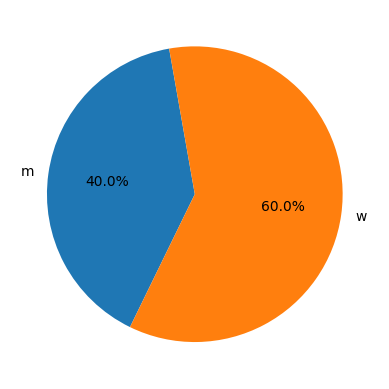

In [2]:
werte,absH = np.unique(df["Geschlecht"],return_counts=True)

#pip install matplotlib
import matplotlib.pyplot as plt

plt.pie(absH,labels=werte,startangle=100,autopct="%1.1f%%" ) #autopct ist wie die Daten formatiert sind.
plt.show()

#### <span style="color:rgb(160,0,86)">Brauchen wir nur Matplotlib?</span>

Das Modul **Matplotlib** ist ein sehr flexibler ***Werkzeugkasten***, aber man muss viel selbst einstellen.

Das Modul **Seaborn** erlaubt ***Design out of the box*** mit weniger Aufwand und ist besonders praktisch für **Datenanalyse mit pandas**.

- **Seaborn** ist ein auf **Matplotlib** aufbauendes Visualisierungsmodul, das für statistische Datenanalyse entwickelt wurde.
- Es bietet eine einfachere Syntax, sinnvolle Standarddesigns und unterstützt direkt den Umgang mit **pandas DataFrames**.
- Link zur **Modulseite**: https://seaborn.pydata.org/ 

Typische Eigenschaften von **Seaborn** Methoden sind die automatische Achsenbeschriftung aus DataFrame-Spalten, eingebaute Diagrammtypen wie ***scatterplot***, ***boxplot***, ***violinplot***, ***heatmap***, etc.

#### <span style="color:rgb(160,0,86)">Balkendagramme</span>
Die Verteilung des **ordinalen** Merkamls **Prädikat** können wir mit einem **Balkendiagramm** darstellen:

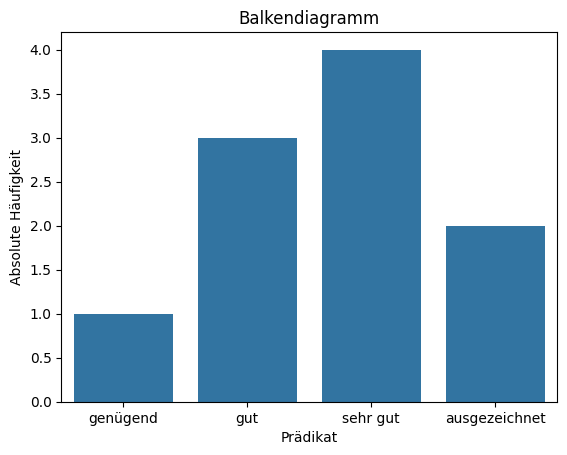

In [3]:
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure() #Construktur, erstelle figure-objekt

ax = fig.add_subplot(1,1,1) 
# 1.Zahl -> Zeile, 2. Zahl -> Spalte, 3. Zahl -> Position
sns.countplot(data=df,x="Prädikat",
              order=["genügend","gut","sehr gut","ausgezeichnet"],ax = ax)
ax.set_title("Balkendiagramm")
ax.set_ylabel("Absolute Häufigkeit")

plt.show()

***Wie weit*** die Werte des Markmals **Prädikat** auseinander liegen, ist ***nicht relevant***. Sie sind nur von <tt>'genügend'</tt> bis <tt>'ausgezeichnet'</tt> geordnet.

Die ***Abstände zwischen Werten*** eines **metrischen** Merkmales sind hingegen eindeutig gegeben. 

Oft haben metrische Merkmale auch ***viele verschiedene Werte***, so dass ein Balkendiagramm die Charakteristik einer Verteilung nicht mehr sinnvoll abbildet. 

Daher ***unterteilen wir die Werte*** eines metrischen Merkmals in Abschitte, sogenannte ***Klassen***, und bilden die absoluten oder relativen Häufigkeiten der Werte in diesen Klassen mit Rechtecken ab, deren Höhe proportional zu diesen Häufigkeiten ist. 

#### <span style="color:rgb(160,0,86)">Histogramme und Dichtediagramme</span>

Wenn also Häufigkeiten über einer Unterteilung der Zahlenachse abgebildet werden, entsteht ein **Histogramm**:  

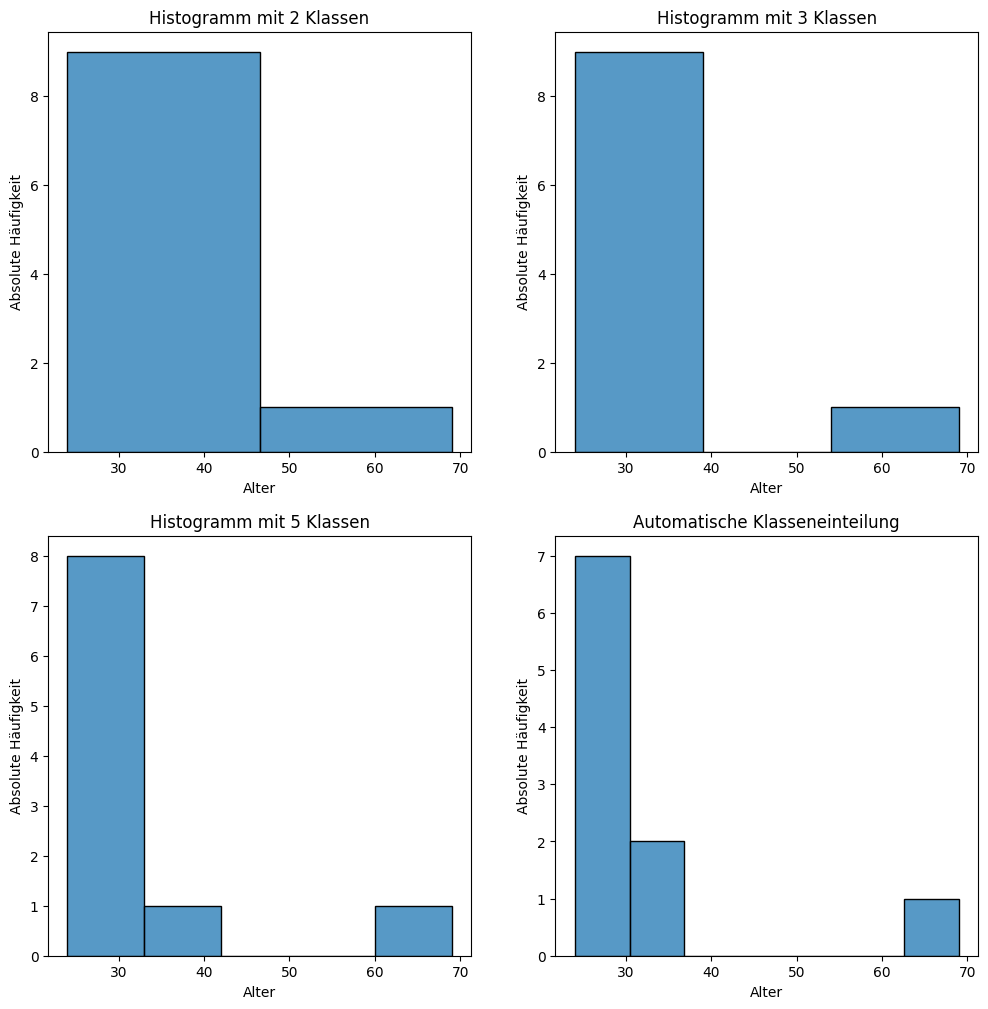

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1) # 1.Zahl -> Zeile, 2. Zahl -> Spalte, 3. Zahl -> Position
sns.histplot(data=df,x="Alter",bins=2,ax=ax1)
ax1.set_title("Histogramm mit 2 Klassen")
ax1.set_ylabel("Absolute Häufigkeit")

ax2 = fig.add_subplot(2,2,2)
sns.histplot(data=df,x="Alter",bins=3,ax=ax2) # bins= ist Anzahl säulen
ax2.set_title("Histogramm mit 3 Klassen")
ax2.set_ylabel("Absolute Häufigkeit")

ax3 = fig.add_subplot(2,2,3)
sns.histplot(data=df,x="Alter",bins=5,ax=ax3)
ax3.set_title("Histogramm mit 5 Klassen")
ax3.set_ylabel("Absolute Häufigkeit")

ax4 = fig.add_subplot(2,2,4)
sns.histplot(data=df,x="Alter",ax=ax4)
ax4.set_title("Automatische Klasseneinteilung")
ax4.set_ylabel("Absolute Häufigkeit")

plt.show()

- In **Histogrammen** werden die Häufigkeiten der Klassen ***proportional zur Höhe der Rechtecke*** abgebildet.
- In **Dichtediagrammen** werden die relativen Häufgikeiten der Klassen ***proportional zur Fläche der Rechtecke*** abgebildet: 

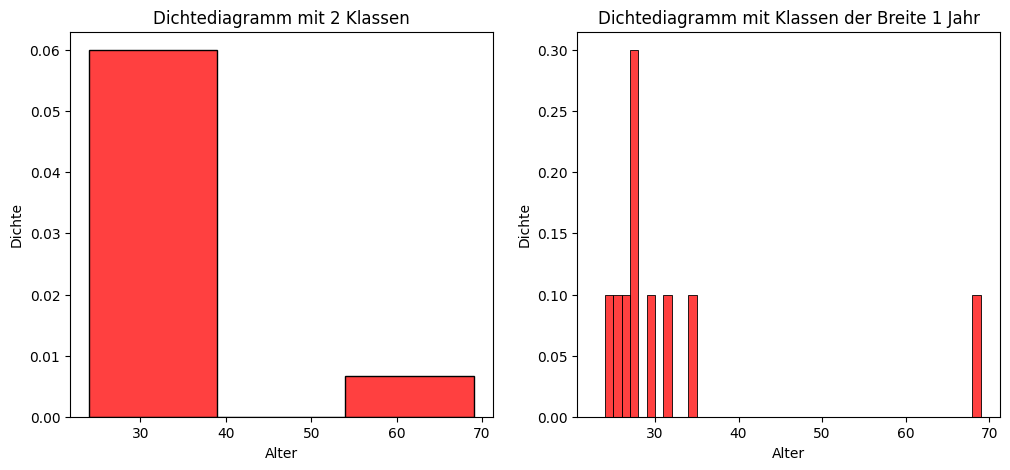

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
sns.histplot(data=df,x="Alter", bins=3,stat="density",color="red",ax=ax1)
ax1.set_title("Dichtediagramm mit 2 Klassen")
ax1.set_ylabel("Dichte")

ax2 = fig.add_subplot(1,2,2)
sns.histplot(data=df,x="Alter",bins=np.arange(23,70),stat="density",color="red",ax=ax2) #arrange => Zäule für jedes Jahr von 23 bis 70
ax2.set_title("Dichtediagramm mit Klassen der Breite 1 Jahr")
ax2.set_ylabel("Dichte")

plt.show()

#### <span style="color:rgb(160,0,86)">Typische Formen von Verteilungen</span>

Ein Histogramm oder Dichtediagramm heisst:
- **symmetrisch**, wenn die meisten Daten um den Mittelwert liegen und ungefähr die hälfte der Daten unter beziehungsweise über dieser mittleren Lage sind.
- **linksschief**, wenn die Daten weiter nach links abfallen. Es gibt also auf der linken Seiten extreme Werte.
- **rechtsschief**, wenn die Daten weiter nach rechts abfallen. Es gibt also auf der rechten Seiten extreme Werte.

Das Merkmal **Alter** hat demnach eine ***rechtsschiefe*** Verteilung.

#### <span style="color:rgb(160,0,86)">Box-Plots</span>

Um die Lage der Daten und die Symmetrie eines metrischen Merkmals graphsich darzustellen, können wir einen sogenannten **Box-Plot** zeichen:
- mit einem Rechteck, dessen Höhe dem Quartilsabstand $Q$ enspricht
- der Median $x_{50}$ unterteil das Rechteck in zwei Teile
- unten und oben wird mit einem *Whisker* der kleinest beziehungsweise der grösste noch normale Wert angegeben.
- Werte, die $1.5Q$-mal weiter vom unteren beziehungsweise vom oberen Quartil enfernt sind, heissen **Ausreisser** und sind nicht mehr innerhalb der beiden Whisker. Solche extreme Werte werden im Box-Plot mit einzelnen Punkten abgebildet.   

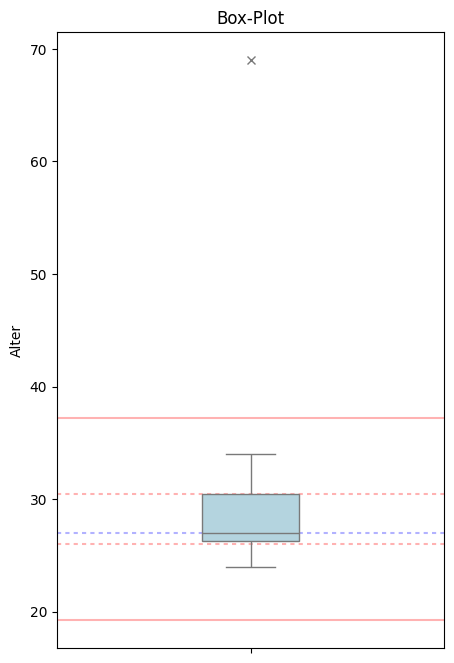

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(1,1,1)
# Über dieser Linie sind Werte Ausreisser nach oben
ax.axhline(30.5+1.5*(30.5-26), color="red",alpha=0.3)
# Unter dieser Linie sind Wert Ausreisser nach unten
ax.axhline(26-1.5*(30.5-26), color="red",alpha=0.3)
# Das obere Quartil (75%-Quantil)
ax.axhline(30.5, color="red",alpha=0.3, dashes=(2,2))
# Der Median (50%-Quantil)
ax.axhline(27, color="blue",alpha=0.3, dashes=(2,2))
# Das untere Quartil (25%-Quantil)
ax.axhline(26, color="red",alpha = 0.3, dashes=(2,2))
# Box-Plot erstellen
sns.boxplot(y="Alter",data=df,
            width=0.25,
            color="lightblue",
            flierprops={"marker":"x"},
            ax=ax)
# Zusätzlich die Daten als Punkte in einem angeordneten Schwarm
#ax = sns.swarmplot(y="Alter",data=df,color="black") 
# Zusätzlich die Daten als Punkte horizontal zufällig angeordnet
#sns.stripplot(y="Alter",data=df,color="black",ax = ax) 
ax.set_title("Box-Plot")

plt.show()

#### <span style="color:rgb(160,0,86)">Regenwolken-Plot:</span>

Wenn in einem **Box-Plot** die Daten ***zusätzlich als Punkte*** dargestellt werden, entsteht ein sogenannter **Regenwolken-Plot**.

Über diese Punkte können zudem auch mit ***unterschiedlichen Farben*** und ***Symbolen*** **weite Merkamle** abgebildet werden. 


#### <span style="color:rgb(160,0,86)">Beispiel: Palmer Penguins</span>

Das **Palmer Penguins** Dataset ist ein offener Datensatz aus der Antarktis. Die Daten stammen von ökologischen Feldstudien auf den ***Palmer-Stationen*** in der Antarktis und enthalten Messungen an **drei Pinguinarten**: <tt>'Adelie'</tt>, <tt>'Chinstrap'</tt> und <tt>'Gentoo'</tt>. 

Erfasst wurden **biologische Merkmale** wie:
- **Körpergewicht**
- **Flossenlänge**
- **Schnabellänge**
- **Schnabeltiefe**
- **Geschlecht**
- **Insel** (Lebensraum)

Der Palmer Penguins Datensatz ist direkt in Seaborn enthalten und kann mit der Funktion **sns.load_dataset()** aus dem **seaborn** Modul geladen werden:

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
penguins.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1032)>

Wir löschen mit der Methode **dropna()** Spalten und Zeilen mit unbekannten Werten:

In [ ]:
penguins.dropna(inplace=True)
penguins.head()

Zu herauszufinden, welche **(species, island) Kombinationen** es im Datensatz gibt, können wir mit der Methode **drop_duplicates()** im Datesatz in diesen Spalten die Duplikate löschen: 

In [ ]:
penguins[["species","island"]].drop_duplicates()

Für diese ***fünf Kombinationen*** erstellen wir nun ***eigene DataFrames*** mit je den Merkmalen **Schnabellänge**, **Schnabeltiefe**, **Flossenlänge**, **Körpergewicht** und **Geschlecht**:

In [ ]:
Merkmale = ["bill_length_mm","bill_depth_mm",
            "flipper_length_mm","body_mass_g","sex"]
AdelieBiscoe = penguins[Merkmale][(penguins["species"]=="Adelie") &
                                  (penguins["island"]=="Biscoe")]
AdelieDream = penguins[Merkmale][(penguins["species"]=="Adelie") &
                                  (penguins["island"]=="Dream")]
AdelieTorgersen = penguins[Merkmale][(penguins["species"]=="Adelie") &
                                  (penguins["island"]=="Torgersen")]
ChinstrapDream = penguins[Merkmale][(penguins["species"]=="Chinstrap") &
                                     (penguins["island"]=="Dream")]
GentooBiscoe = penguins[Merkmale][(penguins["species"]=="Gentoo") &
                                  (penguins["island"]=="Biscoe")]

NameError: name 'penguins' is not defined

Nun erstellen wir **Box-Plots** für die Merkmale **Schnabellänge**, **Schnabeltiefe**, **Flossenlänge** und **Körpergewicht**. Für all diese Merkmale zeichen wir je einen Box-Plot für die Werte <tt>'male'</tt> und <tt>'female'</tt> und brauchen die folgende **Farb-** und **Symbolcodierung**:
- Daten von der Art ***Adelie*** werden <span style="color: red;">***rot***</span> dargestellt
- Daten von der Art ***Chinstrap*** werden <span style="color: green;">***grün***</span> dargestellt
- Daten von der Art ***Gentoo*** werden <span style="color: blue;">***blau***</span> dargestellt
- Daten von der Insel ***Biscoe*** werden mit ***Kreisen*** $\Large\circ$ dargestellt
- Daten von der Insel ***Dream*** werden mit ***Dreiecken*** $\small\triangle$ dargestellt
- Daten von der Insel ***Torgersen*** werden mit ***Sternen*** $\large\ast$ dargestellt

NameError: name 'penguins' is not defined

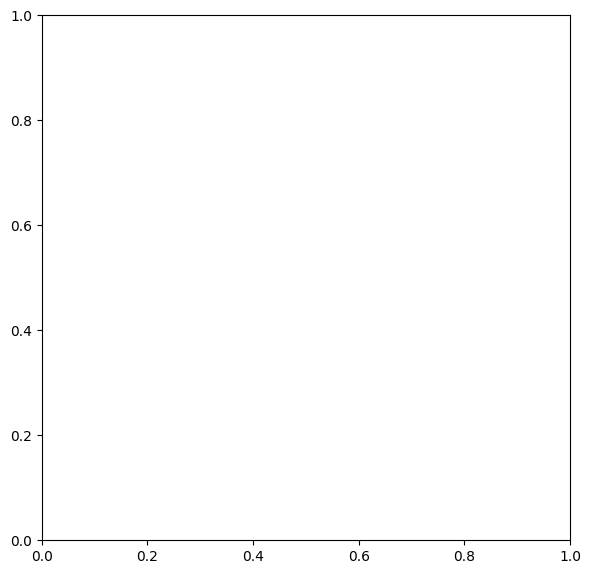

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig = plt.figure(figsize=(15,15))
# Schnabellänge
ax1 = fig.add_subplot(2,2,1)
sns.boxplot(x="sex",y="bill_length_mm",data=penguins,
            width=0.7,flierprops={"marker":"x"},color=".9",ax=ax1)
ax1.tick_params(axis="x",labelsize=15)
# Datenpunkte Adelie - Biscoe
sns.stripplot(x="sex",y="bill_length_mm",order=["Male","Female"],
              data=AdelieBiscoe[["sex","bill_length_mm"]],
              color="red",marker="o",alpha=0.5,size=4,ax=ax1)
# Datenpunkte Adelie - Dream
sns.stripplot(x="sex",y="bill_length_mm",order=["Male","Female"],
              data=AdelieDream[["sex","bill_length_mm"]],
              color="red",marker="^",alpha=0.5,size=5,ax=ax1)
# Datenpunkte Adelie - Torgersen
sns.stripplot(x="sex",y="bill_length_mm",order=["Male","Female"],
              data=AdelieTorgersen[["sex","bill_length_mm"]],
              color="red",marker="*",alpha=0.5,size=5,ax=ax1)
# Datenpunkte Chinstrap - Dream
sns.stripplot(x="sex",y="bill_length_mm",order=["Male","Female"],
              data=ChinstrapDream[["sex","bill_length_mm"]],
              color="green",marker="^",alpha=0.5,size=5,ax=ax1)
# Datenpunkte Gentoo - Biscoe
sns.stripplot(x="sex",y="bill_length_mm",order=["Male","Female"],
              data=GentooBiscoe[["sex","bill_length_mm"]],
              color="blue",marker="o",alpha=0.5,size=4,ax=ax1)
ax1.set_title("Schnabellänge",fontsize=15,pad=10)
plt.xlabel("")
plt.ylabel("")

# Schnabeltiefe
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(x="sex",y="bill_depth_mm",data=penguins,
            width=0.7,flierprops={"marker":"x"},color=".9",ax=ax2)
ax2.tick_params(axis="x",labelsize=15)
# Datenpunkte Adelie - Biscoe
sns.stripplot(x="sex",y="bill_depth_mm",order=["Male","Female"],
              data=AdelieBiscoe[["sex","bill_depth_mm"]],
              color="red",marker="o",alpha=0.5,size=4,ax=ax2)
# Datenpunkte Adelie - Dream
sns.stripplot(x="sex",y="bill_depth_mm",order=["Male","Female"],
              data=AdelieDream[["sex","bill_depth_mm"]],
              color="red",marker="^",alpha=0.5,size=5,ax=ax2)
# Datenpunkte Adelie - Torgersen
sns.stripplot(x="sex",y="bill_depth_mm",order=["Male","Female"],
              data=AdelieTorgersen[["sex","bill_depth_mm"]],
              color="red",marker="*",alpha=0.5,size=5,ax=ax2)
# Datenpunkte Chinstrap - Dream
sns.stripplot(x="sex",y="bill_depth_mm",order=["Male","Female"],
              data=ChinstrapDream[["sex","bill_depth_mm"]],
              color="green",marker="^",alpha=0.5,size=5,ax=ax2)
# Datenpunkte Gentoo - Biscoe
sns.stripplot(x="sex",y="bill_depth_mm",order=["Male","Female"],
              data=GentooBiscoe[["sex","bill_depth_mm"]],
              color="blue",marker="o",alpha=0.5,size=4,ax=ax2)
ax2.set_title("Schnabeltiefe",fontsize=15,pad=10)
plt.xlabel("")
plt.ylabel("")

# Flossenlänge
ax3 = fig.add_subplot(2,2,3)
sns.boxplot(x="sex",y="flipper_length_mm",data=penguins,
            width=0.7,flierprops={"marker":"x"},color=".9",ax=ax3)
ax3.tick_params(axis="x",labelsize=15)
# Datenpunkte Adelie - Biscoe
sns.stripplot(x="sex",y="flipper_length_mm",order=["Male","Female"],
              data=AdelieBiscoe[["sex","flipper_length_mm"]],
              color="red",marker="o",alpha=0.5,size=4,ax=ax3)
# Datenpunkte Adelie - Dream
sns.stripplot(x="sex",y="flipper_length_mm",order=["Male","Female"],
              data=AdelieDream[["sex","flipper_length_mm"]],
              color="red",marker="^",alpha=0.5,size=5,ax=ax3)
# Datenpunkte Adelie - Torgersen
sns.stripplot(x="sex",y="flipper_length_mm",order=["Male","Female"],
              data=AdelieTorgersen[["sex","flipper_length_mm"]],
              color="red",marker="*",alpha=0.5,size=5,ax=ax3)
# Datenpunkte Chinstrap - Dream
sns.stripplot(x="sex",y="flipper_length_mm",order=["Male","Female"],
              data=ChinstrapDream[["sex","flipper_length_mm"]],
              color="green",marker="^",alpha=0.5,size=5,ax=ax3)
# Datenpunkte Gentoo - Biscoe
sns.stripplot(x="sex",y="flipper_length_mm",order=["Male","Female"],
              data=GentooBiscoe[["sex","flipper_length_mm"]],
              color="blue",marker="o",alpha=0.5,size=4,ax=ax3)
ax3.set_title("Flügellänge",fontsize=15,pad=10)
plt.xlabel("")
plt.ylabel("")

# Körpergewicht
ax4 = fig.add_subplot(2,2,4)
sns.boxplot(x="sex",y="body_mass_g",data=penguins,
            width=0.7,flierprops={"marker":"x"},color=".9",ax=ax4)
ax4.tick_params(axis="x",labelsize=15)
# Datenpunkte Adelie - Biscoe
sns.stripplot(x="sex",y="body_mass_g",order=["Male","Female"],
              data=AdelieBiscoe[["sex","body_mass_g"]],
              color="red",marker="o",alpha=0.5,size=4,ax=ax4)
# Datenpunkte Adelie - Dream
sns.stripplot(x="sex",y="body_mass_g",order=["Male","Female"],
              data=AdelieDream[["sex","body_mass_g"]],
              color="red",marker="^",alpha=0.5,size=5,ax=ax4)
# Datenpunkte Adelie - Torgersen
sns.stripplot(x="sex",y="body_mass_g",order=["Male","Female"],
              data=AdelieTorgersen[["sex","body_mass_g"]],
              color="red", marker="*",alpha=0.5,size=5,ax=ax4)
# Datenpunkte Chinstrap - Dream
sns.stripplot(x="sex",y="body_mass_g",order=["Male","Female"],
              data=ChinstrapDream[["sex","body_mass_g"]],
              color="green",marker="^",alpha=0.5,size=5,ax=ax4)
# Datenpunkte Gentoo - Biscoe
sns.stripplot(x="sex",y="body_mass_g",order=["Male","Female"],
              data=GentooBiscoe[["sex","body_mass_g"]],
              color="blue",marker="o",alpha=0.5,size=4,ax=ax4)
ax4.set_title("Körpergewicht",fontsize=15,pad=10)
plt.xlabel("")
plt.ylabel("")

plt.show()

***Weitere*** interessante ***Möglichkeiten*** mit dem Python Modul **Matplotlib** finden wir auf der 

- **Modulseite** unter Beispiele: https://matplotlib.org/stable/gallery/index.html

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>

Laden Sie die Daten *2021_Personalerhebung.csv* und zeichnen Sie für alle Merkmale passende Diagramme, die die Verteilung der Daten abbilden.

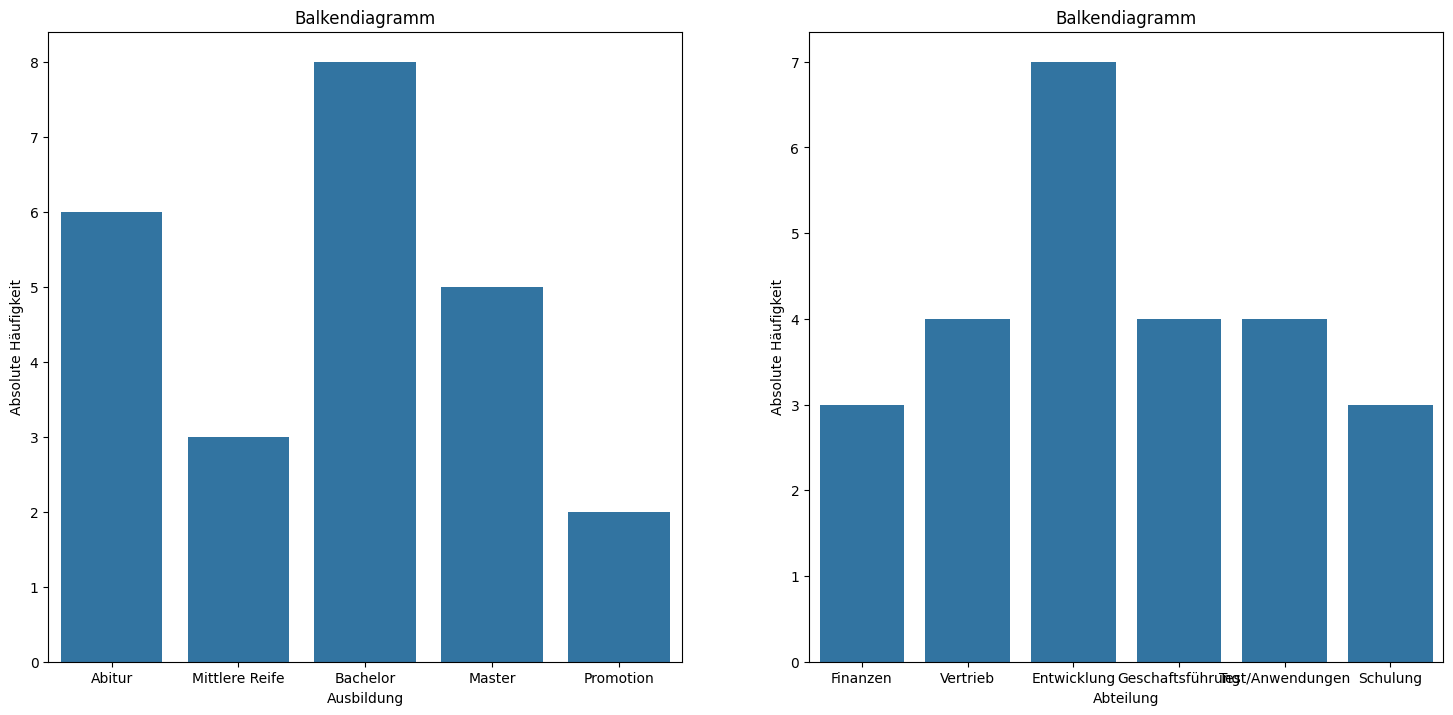

In [22]:
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/muellefa/repos/ASTAT/SW03/Daten/2021_Personalerhebung.csv")
df.head()

fig = plt.figure(figsize=(18,18)) #Construktur, erstelle figure-objekt

ax = fig.add_subplot(2,2,1) 
# 1.Zahl -> Zeile, 2. Zahl -> Spalte, 3. Zahl -> Position
sns.countplot(data=df,x="Ausbildung",
              order=["Abitur","Mittlere Reife","Bachelor","Master","Promotion"],ax = ax)
ax.set_title("Balkendiagramm")
ax.set_ylabel("Absolute Häufigkeit")



ax = fig.add_subplot(2,2,2) 
# 1.Zahl -> Zeile, 2. Zahl -> Spalte, 3. Zahl -> Position
sns.countplot(data=df,x="Abteilung",
              ax = ax)
ax.set_title("Balkendiagramm")
ax.set_ylabel("Absolute Häufigkeit")

plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>

Laden Sie die Daten *Gesundheitskosten.csv* und zeichnen Sie für alle Merkmale passende Diagramme, die die Verteilung der Daten abbilden.

<Figure size 1800x1800 with 0 Axes>

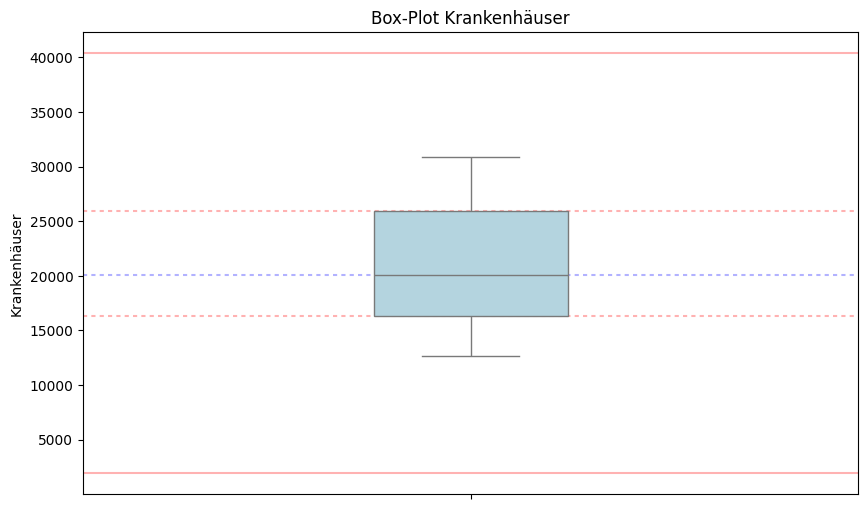

In [23]:
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/muellefa/repos/ASTAT/SW03/Daten/Gesundheitskosten.csv")
df.head()

fig = plt.figure(figsize=(18,18)) #Construktur, erstelle figure-objekt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

# Quartile und IQR berechnen
q1 = df["Krankenhäuser"].quantile(0.25)
q3 = df["Krankenhäuser"].quantile(0.75)
iqr = q3 - q1

# Ausreißergrenzen
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Linien zeichnen
ax.axhline(upper, color="red", alpha=0.3)
ax.axhline(lower, color="red", alpha=0.3)
ax.axhline(q3, color="red", alpha=0.3, dashes=(2,2))
ax.axhline(df["Krankenhäuser"].median(), color="blue", alpha=0.3, dashes=(2,2))
ax.axhline(q1, color="red", alpha=0.3, dashes=(2,2))

# Boxplot für Krankenhäuser
sns.boxplot(y="Krankenhäuser", data=df,
            width=0.25,
            color="lightblue",
            flierprops={"marker":"x"},
            ax=ax)

ax.set_title("Box-Plot Krankenhäuser")


plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Laden Sie die Daten *2022_Mathematik 1 WiSo Urliste* und zeichnen Sie für die Punkteverteilung der Aufgaben passende Diagramme. 

Bestimmen Sie gemäss der Formel $$\frac{\text{Erreichte Anzahl Punkte}}{\text{maximale Anzahl Punkte}}\cdot 5 + 1$$ für alle Studierende die Note und stellen Sie die Verteilung der Noten graphisch dar. Bestimmen Sie auch passende Lage- und Streumasse für die Noten.

In [15]:
punkte = pd.read_excel("/Users/muellefa/repos/ASTAT/SW03/Daten/2022_Mathematik 1 WiSo Urliste.xls")

# wir speichern die bestehenden Namen der Spalten
colNamen = punkte.columns

# und schneiden die relevanten Spalten (axis=1) und Zeilen (axis=0) heraus
punkte.drop(list(colNamen[0:1])+list(colNamen[10:11])+list(colNamen[12:]),axis=1,inplace=True)
punkte.drop([0,1,2,3],axis=0,inplace=True)

# nun geben wir den Spalten einfache Namen
colNamenNeu = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","Version"]
punkte.columns = colNamenNeu

# dann speichern wir die Studierenden mit Veresion A
VersionA = punkte[colNamenNeu][punkte["Version"]=="A"]

# bei den Studierenden mit Version B müssen wir die Reihenfolge der Aufgaben ändern
VersionB = punkte[["A2","A1","A4","A3","A6","A5","A8","A7","A9","Version"]][punkte["Version"]=="B"]
VersionB.columns = colNamenNeu

# zuletzt fügen wir die zwei DataFrame VersionA und VersionB wieder zusammen
punkteNeu = pd.concat([VersionA,VersionB])

punkteNeu["Note"] = (punkteNeu.iloc[:, 0:9].sum(axis=1) * 5) / 36 + 1
punkteNeu["Note"] = pd.to_numeric(punkteNeu["Note"], errors="coerce")
punkteNeu["Note"] = (punkteNeu["Note"] * 2).round() / 2

punkteNeu

,A1,A2,A3,A4,A5,A6,A7,A8,A9,Version,Note
4,3.5,4,3.5,4,4,4,4,4,4,A,6.0
6,1.5,4,3,2.5,3,4,1.5,3,2,A,4.5
7,1.5,3.5,1.5,4,3,0,1,3.5,0,A,3.5
8,3.5,3,3.5,3,3.5,2,3.5,2.5,2,A,4.5
10,4,3.5,3.5,4,3,4,3.5,3,3.5,A,5.5
...,...,...,...,...,...,...,...,...,...,...,...
405,1,1.5,1.5,1,2,0,0.5,1.5,0,B,2.0
406,0,1,0,0,0.5,0,0.5,0,0,B,1.5
408,3.5,3.5,4,3,2.5,4,4,4,4,B,5.5
411,2.5,3,1.5,2,3,0.5,1,1,0,B,3.0


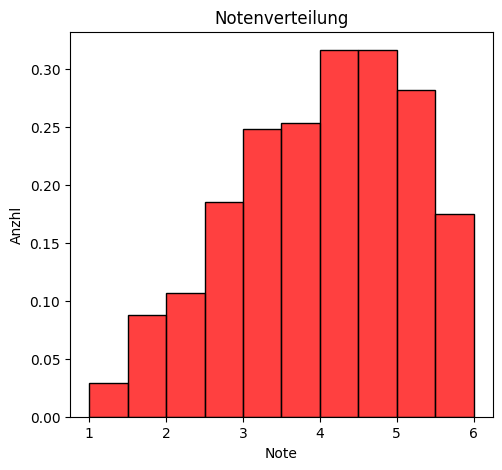

In [20]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
sns.histplot(data=punkteNeu,x="Note", bins=10,stat="density",color="red",ax=ax1)
ax1.set_title("Notenverteilung")
ax1.set_ylabel("Anzhl")


plt.show()

![HSLU](Bilder/LogoHSLU.png)